In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import roc_curve, auc

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('save_total.csv')

## 맨하튼 거리

#### 변수선택 적용 전 KNN 모델평가 (K=17) 

In [3]:
# y 를 이진분류로 변환(1~5:'0'/6~10:'1')
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)

In [4]:
# 특성과 레이블 분리
X = df.drop('quality',axis=1)
y = df['quality'] 

In [5]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 맨하탄 거리를 사용하는 KNeighborsClassifier 생성
knn_manhattan = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
accuracy = knn_manhattan.score(X_test,y_test)

print(f'Test Set Accuracy: {accuracy:.2%}')

Test Set Accuracy: 75.00%


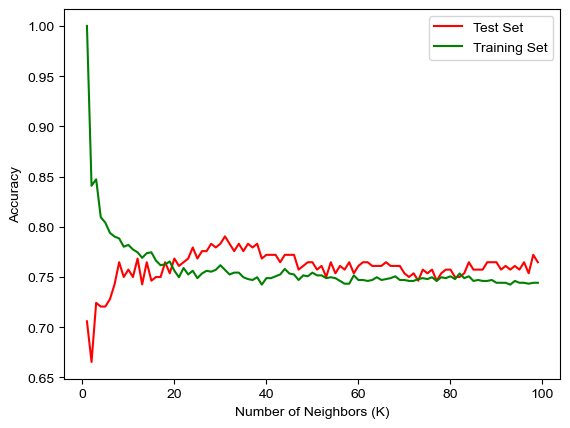

In [10]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# K 값에 따른 성능 그래프
acc_test = []
acc_train = []

for i in range(1, 100):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

plt.plot(range(1, 100), acc_test, 'r', label='Test Set')
plt.plot(range(1, 100), acc_train, 'g', label='Training Set')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# 성능평가표 (Confusion Matrix)
y_pred = knn_manhattan.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       135
           1       0.73      0.79      0.76       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



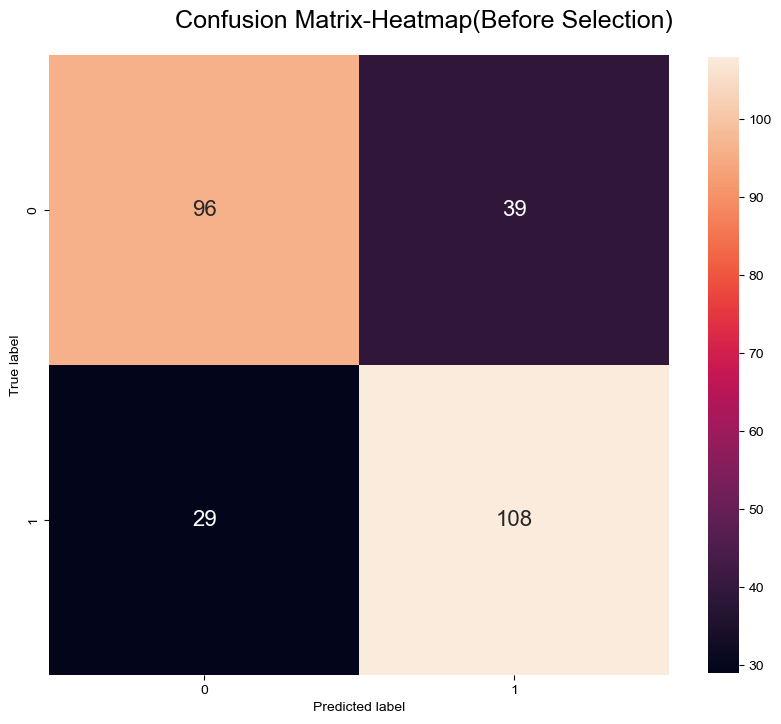

In [12]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# Confusion Matrix 플로팅
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,  annot_kws={'size': 16}, cbar_kws={'shrink': 0.8})

plt.xlabel('Predicted label')
plt.ylabel('True label')

# 제목 추가
plt.suptitle('Confusion Matrix-Heatmap(Before Selection)', fontsize=18, y=0.85)
plt.show()


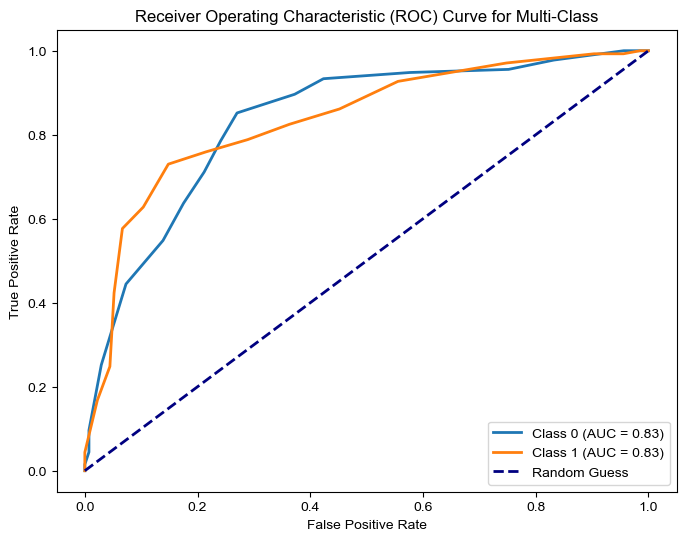

In [13]:
# 각 클래스에 대한 ROC 커브 계산
fpr = dict()
tpr = dict()
roc_auc = dict()

y_scores = knn_manhattan.predict_proba(X_test)

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# 각 클래스에 대한 ROC 커브 그리기
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

#### 변수선택 적용한 KNN 모델평가 (K=13) 

In [14]:
X1 = df[['alcohol', 'sulphates', 'volatile acidity', 'chlorides', 'pH', 'total sulfur dioxide']] 
y = df['quality'] 

In [15]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [17]:
# 맨하탄 거리를 사용하는 KNeighborsClassifier 생성
knn_manhattan = KNeighborsClassifier(n_neighbors=13, metric='manhattan')
knn_manhattan.fit(X1_train, y_train)
accuracy = knn_manhattan.score(X1_test,y_test)

print(f'Test Set Accuracy: {accuracy:.2%}')

Test Set Accuracy: 75.37%


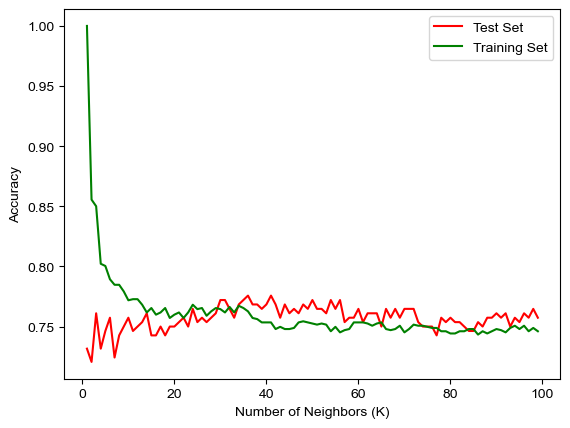

In [18]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# K 값에 따른 성능 그래프
acc_test = []
acc_train = []

for i in range(1, 100):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))

plt.plot(range(1, 100), acc_test, 'r', label='Test Set')
plt.plot(range(1, 100), acc_train, 'g', label='Training Set')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
# 성능평가표 (Confusion Matrix)
y_pred = knn_manhattan.predict(X1_test)
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       135
           1       0.73      0.80      0.77       137

    accuracy                           0.75       272
   macro avg       0.76      0.75      0.75       272
weighted avg       0.76      0.75      0.75       272



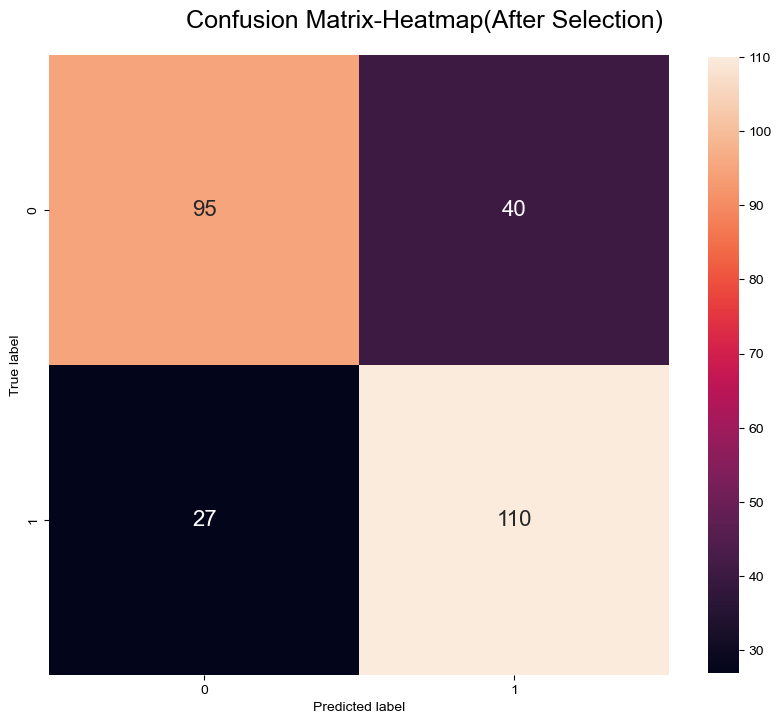

In [20]:
# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# Confusion Matrix 플로팅
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,  annot_kws={'size': 16}, cbar_kws={'shrink': 0.8})

plt.xlabel('Predicted label')
plt.ylabel('True label')

# 제목 추가
plt.suptitle('Confusion Matrix-Heatmap(After Selection)', fontsize=18, y=0.85)

plt.show()

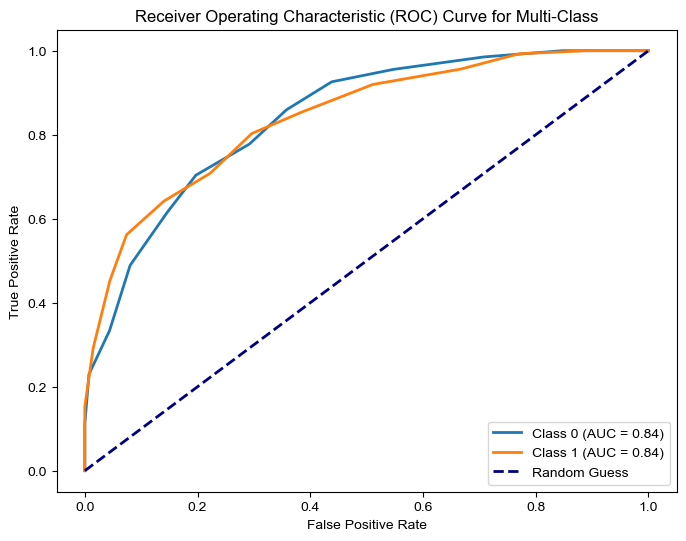

In [21]:
# 각 클래스에 대한 ROC 커브 계산
fpr = dict()
tpr = dict()
roc_auc = dict()

y_scores = knn_manhattan.predict_proba(X1_test)

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

# 각 클래스에 대한 ROC 커브 그리기
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()